In [15]:
from itertools import combinations, groupby
import networkx as nx
import random
import matplotlib.pyplot as plt

[0 0 0 1 1 0 0 0 0 0 1 0 1 0 0]
[0 0 0 0 0 0 1 1 0 1 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 1 1 0 0 0 0 0 0]
[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
[0 1 0 0 1 0 0 1 0 0 0 1 0 0 0]
[1 0 1 0 0 0 0 0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]
[1 0 0 1 0 1 0 0 0 0 1 1 0 1 0]
[0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


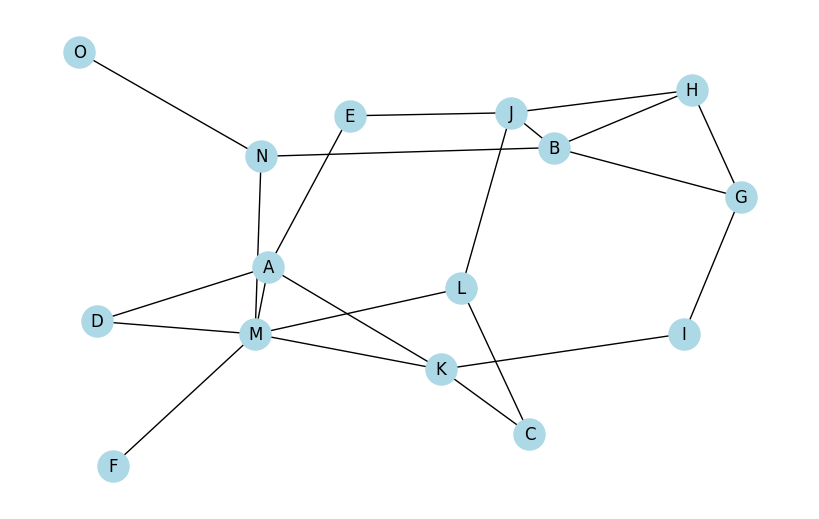

In [16]:

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G


nodes = 15 #random.randint(5,10)
seed = random.randint(1,10)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)
n = G.number_of_nodes()
alp = list(map(chr, range(ord('A'), ord('Z')+1)))
maprelab = {x: y for x, y in zip(range(n), alp)}
G = nx.relabel_nodes(G, maprelab, copy=True)
A = nx.adjacency_matrix(G)
A = A.toarray()
adj_matrix = [ [0 for i in range(n)] for j in range(n)]
for a in A:
    print(a)
plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)